# **Importando bibliotecas** 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import timeit

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib.figure import Figure
from google.colab import files
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from yellowbrick.classifier import ROCAUC,ConfusionMatrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from matplotlib.axis import font_manager
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dados**


## Importação e correlação de dados (não normalizados)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Iniciação Cientifica/FAPESP/DS_FAPESP/DS_Normal_0_Cav_1_DR_2.csv',sep=',')#<PATH_DATATSET_FILE>.csv'
#ex: df = pd.read_csv('DS_Cavitation.csv',sep=',')
df = df.sample(len(df))
n_samples, n_features = df.shape
cols = ['Class']
le = LabelEncoder()
df['ClassType'] = df[cols].apply(le.fit_transform)
df.describe()

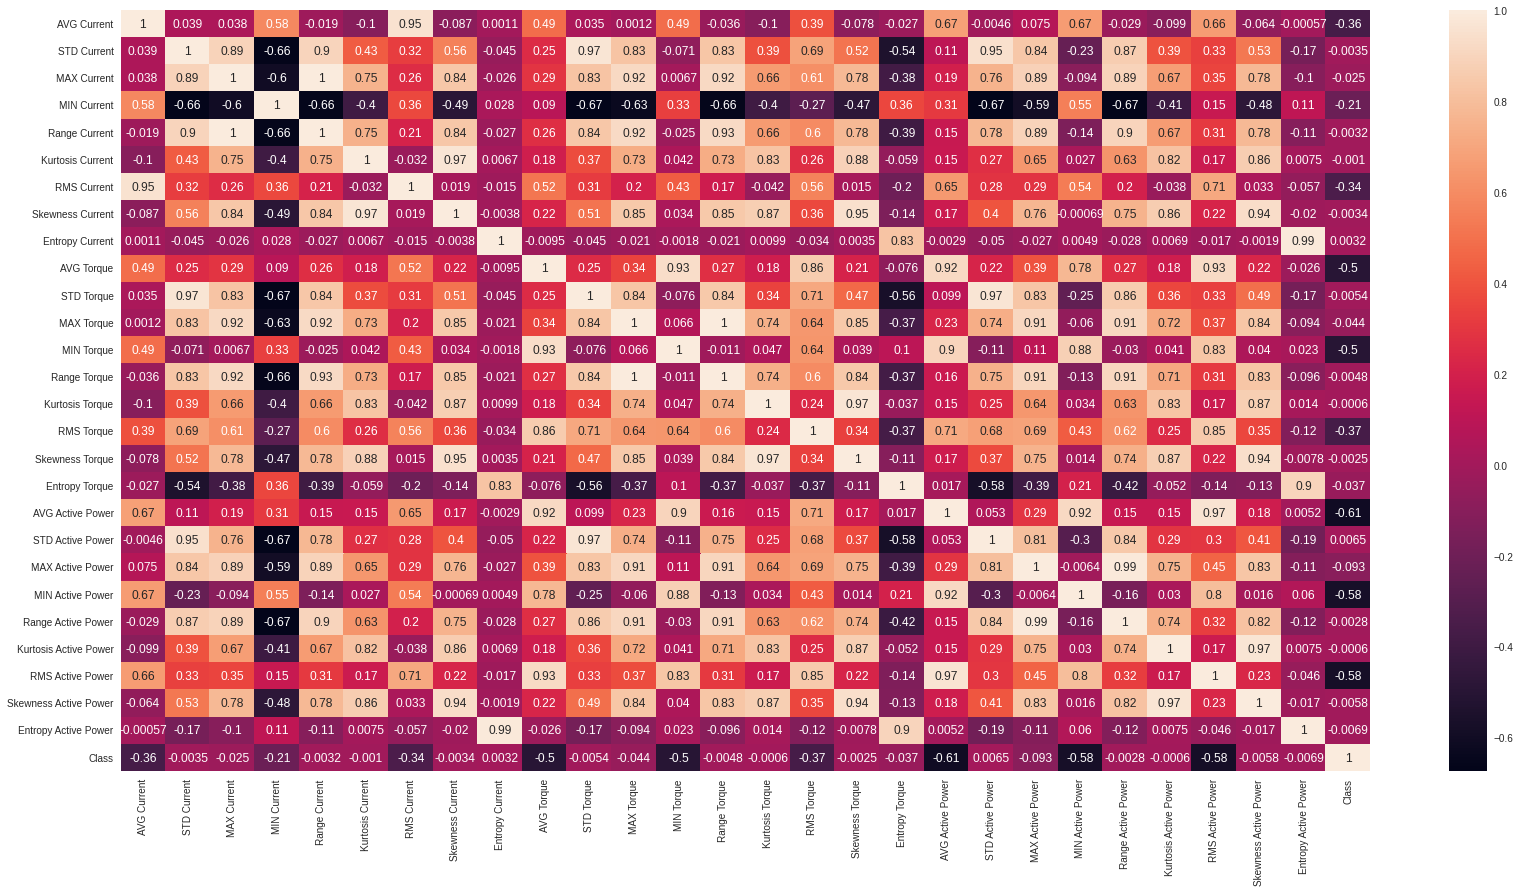

In [4]:
dfCorr = df.iloc[:,0:-1]
plt.figure(figsize=(28, 14))
corr=dfCorr.corr()
sns.heatmap(corr,annot=True)
plt.show()

## Seleção de dados e normalização
Nessa etapa deve ser atribuído a variável "df_norm" quais dados serão utilizados para análise.

In [5]:
tag0 = 'all atributes'
df_norm0 = df[['AVG Current','STD Current', 'MAX Current', 'MIN Current', 'Range Current', 'Kurtosis Current', 'RMS Current', 'Skewness Current', 'Entropy Current', 'AVG Torque', 'STD Torque', 'MAX Torque', 'MIN Torque', 'Range Torque', 'Kurtosis Torque', 'RMS Torque', 'Skewness Torque', 'Entropy Torque','AVG Active Power', 'STD Active Power', 'MAX Active Power', 'MIN Active Power', 'Range Active Power', 'Kurtosis Active Power', 'RMS Active Power', 'Skewness Active Power', 'Entropy Active Power']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

tag1 = 'only Current'
df_norm1 = df[['AVG Current','STD Current', 'MAX Current', 'MIN Current', 'Range Current', 'Kurtosis Current', 'RMS Current', 'Skewness Current', 'Entropy Current']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
tag2 = 'Best Current'
df_norm2 = df[['RMS Current']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

tag3 = 'only torque'
df_norm3 = df[['AVG Torque', 'STD Torque', 'MAX Torque', 'MIN Torque', 'Range Torque', 'Kurtosis Torque', 'RMS Torque', 'Skewness Torque', 'Entropy Torque']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
tag4 = 'best torque'
df_norm4 = df[['AVG Torque']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

tag5 = 'only power active'
df_norm5 = df[['AVG Active Power', 'STD Active Power', 'MAX Active Power', 'MIN Active Power', 'Range Active Power', 'Kurtosis Active Power', 'RMS Active Power', 'Skewness Active Power', 'Entropy Active Power']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
tag6 = 'best active'
df_norm6 = df[['RMS Active Power']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

tag7 = 'CSF'
df_norm7 = df[['AVG Active Power', 'RMS Active Power']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#Alterar valor de df_norm e tag de acordo com os dados a serem analisados

df_norm = df_norm0
tagName = tag0


# **SVM**

In [ ]:
y = df.iloc[:, 27]

kfold = StratifiedKFold(n_splits=5, shuffle=True)
i = 0
Dados_simu = pd.DataFrame(columns=['Acurácia', 'Sens', 'Esp', 'Prec','Exa', 'Err','FP_s','FN_s','TP_s','TN_s'])

for train, test in kfold.split(df_norm, y):
  cvscores = []
  TP_s, TN_s, FP_s, FN_s = [], [], [], []
  Sens, Esp, Prec, Exa, Err = [], [], [], [], []
  i = i + 1
  svmClassifier= GaussianProcessClassifier(1.0 * RBF(1.0))
  svmClassifier.fit(df_norm.iloc[train], y.iloc[train])

  print(f'Tratativa {i}')
  prediction = svmClassifier.predict(df_norm.iloc[test])
  print('A acurácia do SVM kernel Gaussiano é:',metrics.accuracy_score(prediction,y.iloc[test]))
  cvscores.append(metrics.accuracy_score(prediction,y.iloc[test]))
  CM = confusion_matrix( y.iloc[test],prediction)
  #plot_confusion_matrix(svmClassifier,df_norm.iloc[test], y.iloc[test])

  TN = CM[1][1]
  FN = CM[1][0]
  FP = CM[0][1]
  TP = CM[0][0]
  FP_s.append((FP))
  FN_s.append((FN))
  TP_s.append((TP))
  TN_s.append((TN))

  if TP + FN == 0:
    Sens.append(0)
  else:
    Sens.append(TP / (TP + FN))
  if TN + FP == 0:
    Esp.append(0)
  else:
    Esp.append(TN / (TN + FP))
  if TP + FP == 0:
    Prec.append(0)
  else:
    Prec.append(TP / (TP + FP))
  Exa.append((TP + TN) / (TP + TN + FP + FN))
  Err.append((FP + FN) / (TP + TN + FP + FN))

  #print("Acurácia %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
  #print(f"Sensibilidade: {np.mean(Sens) * 100} +/- {np.std(Sens) * 100}")
  #print(f"Especificidade: {np.mean(Esp) * 100} +/- {np.std(Esp) * 100}")
  #print(f"Precisão: {np.mean(Prec) * 100} +/- {np.std(Prec) * 100}")
  #print(f"Exatidão: {np.mean(Exa) * 100} +/- {np.std(Exa) * 100}")
  #print(f"Erro: {np.mean(Err) * 100} +/- {np.std(Err) * 100}")
  Dados_simu = Dados_simu.append({'Acurácia':np.mean(cvscores)*100, 'Sens':np.mean(Sens) * 100, 'Esp':np.mean(Esp) * 100, 'Prec':np.mean(Prec) * 100, 'Exa':np.mean(Exa) * 100,
                                  'Err': np.mean(Err) * 100,'FP_s':FP,'FN_s': FN,'TP_s': TP,'TN_s': TN}, ignore_index=True) 



Dados_simu.to_excel("SVM_Gaussian("+ tagName +").xlsx")

files.download("SVM_Gaussian("+ tagName +").xlsx")  



In [ ]:
svmClassifier.get_params(deep=True)

# **RNA**

## RNA (1 a 20 neuronios por camada oculta)


In [ ]:
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return "%d:%02d:%02d" % (hour, minutes, seconds)

# define the kera

#C1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
#C2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Dados_simu = pd.DataFrame(columns=['Camada 1', 'Camada 2','Acurácia', 'Sens', 'Sens_st', 'Esp', 'Esp_st', 'Prec', 'Prec_st', 'Exa', 'Exa_st', 'Err','Err_st','FP_s','FN_s','TP_s','TN_s'])

C1=[2,2] #teste#
C2=[2,2] #teste#

inicio = timeit.default_timer()


for A, B in enumerate(C1):
  for C, D in enumerate(C2):
        cvscores = []
        TP_s, TN_s, FP_s, FN_s = [], [], [], []
        Sens, Esp, Prec, Exa, Err = [], [], [], [], []
        for i in range(0, 1):
            kfold = StratifiedKFold(n_splits=5, shuffle=True)
            n = 0;
            for train, test in kfold.split(df_norm, y):
              x_test = df_norm.iloc[test].values
              x_train = df_norm.iloc[train].values
              y_test = y.iloc[test].values
              y_train = y.iloc[train].values
              
              print(f"Treino: {n} | C1:{B}, C2:{D}")
              TP = 0
              TN = 0 
              FP = 0
              FN = 0
              n = n + 1

              # create model

              model = MLPClassifier(hidden_layer_sizes=(B,D),activation="relu",solver="adam")
              history = model.fit(x_train, y_train)
                # evaluate the model
              predictions = model.predict(df_norm.iloc[test])
              scores = metrics.accuracy_score(predictions,y.iloc[test])

              cvscores.append(scores)

              y_test = y.iloc[test]
              for pos, value in enumerate(predictions):
                
                if value != y_test.iloc[pos]: 
                  if value == 1:
                    FP = FP + 1
                  if value == 0:
                    FN = FN + 1
                if value == y_test.iloc[pos]:
                  if value == 1:
                    TP = TP + 1
                  if value == 0:
                    TN = TN + 1

                FP_s.append((FP))
                FN_s.append((FN))
                TP_s.append((TP))
                TN_s.append((TN))

                # Cálculo de parâmetros:
                if TP + FN == 0:
                    Sens.append(0)
                else:
                    Sens.append(TP / (TP + FN))
                if TN + FP == 0:
                    Esp.append(0)
                else:
                    Esp.append(TN / (TN + FP))
                if TP + FP == 0:
                    Prec.append(0)
                else:
                    Prec.append(TP / (TP + FP))
                Exa.append((TP + TN) / (TP + TN + FP + FN))
                Err.append((FP + FN) / (TP + TN + FP + FN))


        print("Acurácia %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
        print(f"Sensibilidade: {np.mean(Sens) * 100} +/- {np.std(Sens) * 100}")
        print(f"Especificidade: {np.mean(Esp) * 100} +/- {np.std(Esp) * 100}")
        print(f"Precisão: {np.mean(Prec) * 100} +/- {np.std(Prec) * 100}")
        print(f"Exatidão: {np.mean(Exa) * 100} +/- {np.std(Exa) * 100}")
        print(f"Erro: {np.mean(Err) * 100} +/- {np.std(Err) * 100}")
        Dados_simu = Dados_simu.append({'Camada 1':B, 'Camada 2':D,'Acurácia':np.mean(cvscores)*100, 'Sens':np.mean(Sens) * 100, 'Sens_st':np.std(Sens) * 100, 'Esp':np.mean(Esp) * 100, 'Esp_st':np.std(Esp) * 100, 'Prec':np.mean(Prec) * 100, 'Prec_st':np.std(Prec) * 100, 'Exa':np.mean(Exa) * 100, 'Exa_st': np.std(Exa) * 100, 
                                        'Err': np.mean(Err) * 100,'Err_st': np.std(Err) * 100,'FP_s':FP_s[-1],'FN_s': FN_s[-1],'TP_s': TP_s[-1],'TN_s': TN_s[-1]}, ignore_index=True)          
        print("-----------FIM----------")
Fim = timeit.default_timer()

Dados_simu.to_excel("RNA("+ tagName +").xlsx")
files.download("RNA("+ tagName +").xlsx")

print(f"Tempo: {convert(Fim - inicio)}")
print("-----FIM-----")